<a href="https://colab.research.google.com/github/Hack-it-Rafi/Machine_Learning_Classwork/blob/main/hw4/linear-regression-exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚘 💵 HW4 Lab: Used cars and linear regression

<img src="https://github.com/joshuagrossman/mse125-labs-public/blob/main/hw4/img/cars.jpeg?raw=1" alt= “cars” width="500" />

## ✅ Setup and data import
In this lab, we'll explore correlation, simple regression, multiple regression, and confidence intervals with used car data from [Edmunds.com](https://edmunds.com). Our goal will be to predict the price of used cars using the features of each car.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [11]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(precision=3, suppress=True) # For numpy arrays

# Format plots with a white background and dark features.
sns.set_theme(style="whitegrid") # Similar to theme_bw() in ggplot2

# Increase the default text size of plots.
plt.rcParams.update({'font.size': 20})

# Increase the default plot width and height.
plt.rcParams['figure.figsize'] = [12, 8] # Equivalent to options(repr.plot.width=12, repr.plot.height=8)

cars = pd.read_csv("https://jdgrossman.com/assets/used-cars.tsv", sep='\t')

# peek at 10 random rows
print(cars.sample(10))

      type  year        make     model          trim  mileage  price
436   USED  2012         BMW  3 Series          328i    53569  30995
220   USED  2012        Audi        A4  2.0T Premium    55997  24988
660   USED  2004    Cadillac       CTS          Base    97000   7999
163   USED  2007       Acura       MDX          Base    88903  20995
513   USED  2012         BMW  3 Series          328i    42571  35500
1284  USED  2012  Volkswagen     Jetta             S    65985  13495
524   USED  2011         BMW  3 Series   328i xDrive    37212  23400
883   USED  2012       Honda    Accord            LX    27885  16998
551   USED  2004         BMW  3 Series          325i   103390   7991
1235  USED  2013  Volkswagen     Jetta       SE PZEV    36706  13998


## 🚀 Exercise 1

Create a new dataset called `accords`. The dataset should only include rows corresponding to used Honda Accords.

Using the `accords` data and the `lm` function, fit the following linear regression model:

$$ y_{\text{price,}i} = \beta_0 + \beta_1 x_{\text{mileage},i} + \epsilon_i, $$

where $\epsilon_i \sim N(0, \sigma^2)$.

Print your regression output with the `summary` function. Using your output, identify and interpret the following quantities in no more than one sentence each:

- $\hat{\beta}_0$
- $\hat{\beta}_1$
- $\text{se}({\hat{\beta}_0})$,
- $\text{se}({\hat{\beta}_1})$,
- $\hat{\sigma}$
- $\text{R}^2$

Note: You should not report more precision than is necessary. For example, if your model returns a coefficient of 1.123456, it's sufficient (and desirable) to report 1.1 or 1.12 as the coefficient.

In [12]:
# Your code here!
accords = cars[(cars["make"] == "Honda") & (cars["model"] == "Accord")]

# Define X (independent variable) and y (dependent variable)
X = accords["mileage"]
y = accords["price"]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit linear regression model
model_accords = sm.OLS(y, X).fit()

# Print summary
print(model_accords.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     348.9
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           2.58e-37
Time:                        15:50:17   Log-Likelihood:                -1122.7
No. Observations:                 122   AIC:                             2249.
Df Residuals:                     120   BIC:                             2255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.068e+04    399.474     51.757      0.0

---

The value of $\hat{\beta}_0$ with units: 20675.67

Interpretation:

---

The value of $\hat{\beta}_1$ with units: -0.0878

Interpretation:

---

The value of $\text{se}({\hat{\beta}_0})$ with units: 399.4744

Interpretation:

---

The value of $\text{se}({\hat{\beta}_1})$ with units: 0.0047

Interpretation:

---

The value of $\hat{\sigma}$ with units: 2420

Interpretation:

---

The value of $\text{R}^2$ with units: 0.744

Interpretation:

---

## 🚀 Exercise 2

Using the `predict` function and the model from the previous exercise, predict the average price of a used Honda Accord with an odometer reading of 50,000 miles. Provide a normally-approximated confidence interval for this mean.

In [14]:
import pandas as pd

new_data_50k = pd.DataFrame({'const': 1, 'mileage': 50000}, index=[0])

# Get prediction + confidence interval
predictions_50k = model_accords.get_prediction(new_data_50k).summary_frame(alpha=0.05)

# Extract results
predicted_mean = predictions_50k["mean"].iloc[0]
lower_bound = predictions_50k["mean_ci_lower"].iloc[0]
upper_bound = predictions_50k["mean_ci_upper"].iloc[0]

# Print results
print(f"Predicted average price for 50,000 miles: ${predicted_mean:.2f}")
print(f"95% Confidence Interval for the mean price: [${lower_bound:.2f}, ${upper_bound:.2f}]")

Predicted average price for 50,000 miles: $16285.20
95% Confidence Interval for the mean price: [$15809.15, $16761.24]


## 🚀 Exercise 3

Repeat Exercise 2 for a used Honda Accord with an odometer reading of 300,000 miles.

Using this result, can you identify a critical issue with your regression model? Answer in one or two sentences.

In [16]:
# Your code here!
# Create new data explicitly with 'const' and 'mileage' columns to match the model's exog
new_data_300k = pd.DataFrame({'const': 1, 'mileage': 300000}, index=[0])

# Get predictions with confidence interval
predictions_300k = model_accords.get_prediction(new_data_300k).summary_frame(alpha=0.05)

# Extract values
predicted_mean_300k = predictions_300k["mean"].iloc[0]
lower_bound_300k = predictions_300k["mean_ci_lower"].iloc[0]
upper_bound_300k = predictions_300k["mean_ci_upper"].iloc[0]

# Print results
print(f"Predicted average price for 300,000 miles: ${predicted_mean_300k:.2f}")
print(f"95% Confidence Interval for the mean price: [${lower_bound_300k:.2f}, ${upper_bound_300k:.2f}]")

Predicted average price for 300,000 miles: $-5667.20
95% Confidence Interval for the mean price: [$-7842.02, $-3492.38]


---

Write your answer to Exercise 3 here.


---

## 🚀 Exercise 4

Graphically present your regression model from Exercise 1. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Note that this can be achieved in R using
`geom_smooth` function from `ggplot2`.

- Make sure to adjust the limits of your plot so you can see the issue you identified in the previous problem.

- Format your plot nicely!

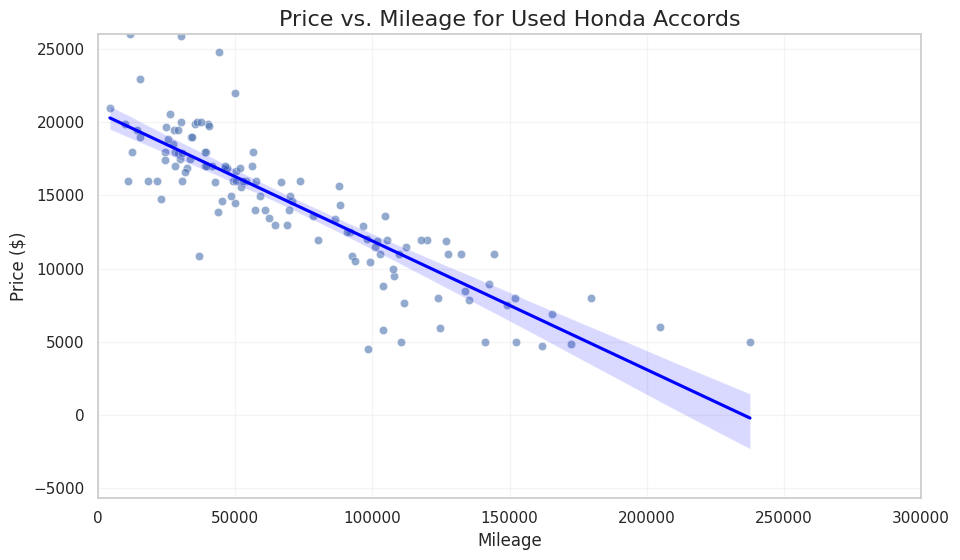

In [18]:
# Your code here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=accords, x="mileage", y="price", alpha=0.6)

# Regression line with confidence interval
sns.regplot(
    data=accords,
    x="mileage",
    y="price",
    scatter=False,
    ci=95,
    line_kws={"color": "blue"}
)

# Compute ymin dynamically like the R version
# Correctly create the DataFrame for prediction with both 'const' and 'mileage' columns
pred_data_300k = pd.DataFrame({'const': 1, 'mileage': 300000}, index=[0])
pred_300k = model_accords.get_prediction(pred_data_300k)
pred_300k_mean = pred_300k.predicted_mean[0]

y_min = min(0, pred_300k_mean)
y_max = accords["price"].max()

x_max = max(300000, accords["mileage"].max())

# Labels & limits
plt.title("Price vs. Mileage for Used Honda Accords", fontsize=16)
plt.xlabel("Mileage")
plt.ylabel("Price ($)")
plt.ylim(y_min, y_max)
plt.xlim(0, x_max)

plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


## 🚀 Exercise 5

Address the issue illustrated in Exercises 3 and 4 by refitting your model with a log-transformed outcome.

Use your new model to predict the price (in dollars) of a Honda Accord with a mileage of 50,000 and a mileage of 300,000. **Print the new predicted prices.**

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Make a clean copy to avoid SettingWithCopyWarning
accords_clean = accords.copy()

# Log transform the price
accords_clean["log_price"] = np.log(accords_clean["price"])

# Fit log-linear model
X = sm.add_constant(accords_clean["mileage"])
y = accords_clean["log_price"]
model_accords_log = sm.OLS(y, X).fit()

# ---- Prediction for 50k miles ----
new_data_50k = pd.DataFrame({"mileage": [50000]})
new_data_50k = sm.add_constant(new_data_50k, has_constant="add")

pred_50k = model_accords_log.get_prediction(new_data_50k).summary_frame()
predicted_price_50k = np.exp(pred_50k["mean"].iloc[0])

# ---- Prediction for 300k miles ----
new_data_300k = pd.DataFrame({"mileage": [300000]})
new_data_300k = sm.add_constant(new_data_300k, has_constant="add")

pred_300k = model_accords_log.get_prediction(new_data_300k).summary_frame()
predicted_price_300k = np.exp(pred_300k["mean"].iloc[0])

print(f"New predicted price for 50,000 miles: ${predicted_price_50k:.2f}")
print(f"New predicted price for 300,000 miles: ${predicted_price_300k:.2f}")


New predicted price for 50,000 miles: $15745.93
New predicted price for 300,000 miles: $2498.62


## 🚀 Exercise 6

Graphically present your regression model from Exercise 5. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Make sure to adjust the limits of your plot so you can see that the issue you identified earlier is now fixed.

- Format your plot nicely!

- Note that the new model can be plotted in R using the `geom_smooth` function with the following arguments:

`geom_smooth(method = "glm", formula = y~x, method.args = list(family = gaussian(link = 'log')))`

> Note: `geom_smooth(method='lm', formula=log(y)~x)` will also plot the correct model (with much prettier and clearer syntax!). However, it puts the model on a logarithmic y-scale instead of a standard numeric scale.
>
> Alternatively, you could use `geom_line()` with a dataset consisting of many possible mileage values (e.g., 0 through 350,000) along with the corresponding predictions  from your new model.

/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


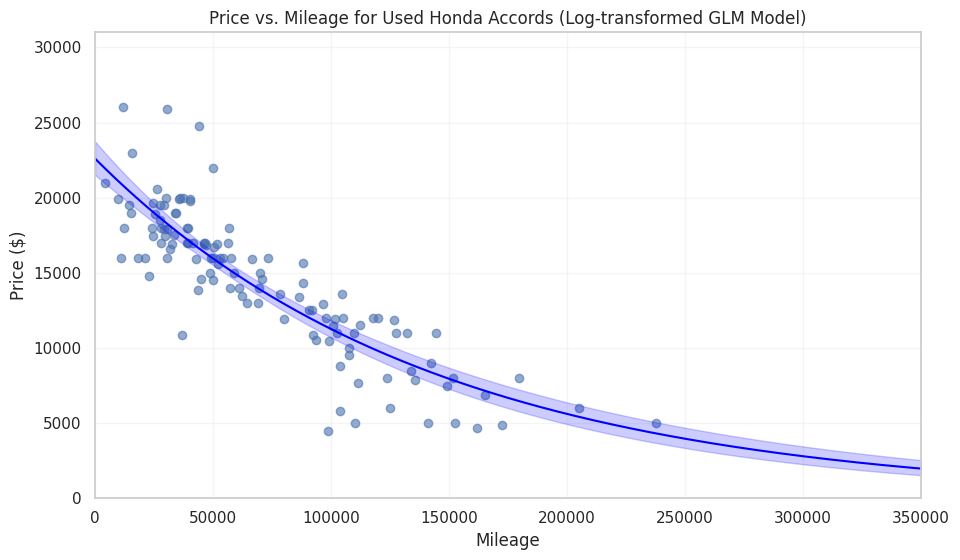

In [23]:
# Your code here!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --- Fit GLM with log link ---
X = sm.add_constant(accords["mileage"])
y = accords["price"]
glm_log = sm.GLM(y, X, family=sm.families.Gaussian(sm.families.links.log()))
glm_log_fit = glm_log.fit()

# --- Data for smooth curve ---
mileage_grid = np.linspace(0, 350000, 400)
X_grid = sm.add_constant(pd.DataFrame({"mileage": mileage_grid}))

pred = glm_log_fit.get_prediction(X_grid).summary_frame()

# --- Prepare plot ---
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(accords["mileage"], accords["price"], alpha=0.6)

# Fitted line
plt.plot(mileage_grid, pred["mean"], color="blue")

# Confidence interval band
plt.fill_between(
    mileage_grid,
    pred["mean_ci_lower"],
    pred["mean_ci_upper"],
    color="blue",
    alpha=0.2
)

# Labels and limits
plt.title("Price vs. Mileage for Used Honda Accords (Log-transformed GLM Model)")
plt.xlabel("Mileage")
plt.ylabel("Price ($)")
plt.xlim(0, 350000)
plt.ylim(0, accords["price"].max() + 5000)

plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()



## 🚀 Exercise 7

Identify and interpret the following components of your log-transformed model:

- $\exp(\hat{\beta}_0)$
- $\exp(\hat{\beta}_1)$
- $\text{R}^2$

Interpret $\exp(\hat{\beta}_1)$ in terms of **an increase in 10,000 miles**, not an increase of 1 mile.

Tip: Use the `coef` function to extract the model coefficients from your model object.

In [24]:
# Your code here!
import numpy as np

# Extract coefficients
coefs = model_accords_log.params
beta0_hat = coefs['const']
beta1_hat = coefs['mileage']

# Exponentiated coefficients
exp_beta0_hat = np.exp(beta0_hat)
exp_beta1_hat = np.exp(beta1_hat)
exp_beta1_10k_miles = np.exp(beta1_hat * 10000)

# R-squared
r_squared_log = model_accords_log.rsquared

print(f"The value of exp(beta_0): {exp_beta0_hat:.2f}")
print(f"The value of exp(beta_1): {exp_beta1_hat:.6f}")
print(f"The value of R^2: {r_squared_log:.3f}")

print("\n--- Interpretation ---\n")
print(f"exp(beta_0) = ${exp_beta0_hat:.2f}: This is the predicted price of a Honda Accord with 0 miles (a brand new car).")
print(f"exp(beta_1) = {exp_beta1_hat:.6f}: For every additional mile, the price changes by this multiplicative factor.")
print(f"An increase of 10,000 miles multiplies the price by {exp_beta1_10k_miles:.2f},")
print(f"which corresponds to a {(exp_beta1_10k_miles - 1) * 100:.2f}% change.")
print(f"\nR^2 = {r_squared_log:.3f}: About {r_squared_log * 100:.1f}% of the variation in log(price) is explained by mileage.")



The value of exp(beta_0): 22754.22
The value of exp(beta_1): 0.999993
The value of R^2: 0.748

--- Interpretation ---

exp(beta_0) = $22754.22: This is the predicted price of a Honda Accord with 0 miles (a brand new car).
exp(beta_1) = 0.999993: For every additional mile, the price changes by this multiplicative factor.
An increase of 10,000 miles multiplies the price by 0.93,
which corresponds to a -7.10% change.

R^2 = 0.748: About 74.8% of the variation in log(price) is explained by mileage.


---

The value of $\exp(\hat{\beta}_0)$ with units: 22754.22

Interpretation:

---

The value of $\exp(\hat{\beta}_1)$ with units: 0.999

Interpretation:

---

The value of $\text{R}^2$ with units: 0.748

Interpretation:

---

## 🚀 Exercise 8

Refine your regression model from Exercise 5 to include the model year as an additional predictor. You should still use just the Honda Accord data.

In one sentence, compare the $R^2$ of the revised regression model to your model from Exercise 5.

In [25]:
# Your code here!
import numpy as np
import statsmodels.api as sm

# Prepare data
accords_clean = accords.copy()
accords_clean["log_price"] = np.log(accords_clean["price"])

X = accords_clean[["mileage", "year"]]
X = sm.add_constant(X)
y = accords_clean["log_price"]

# Fit model
model_accords_log_year = sm.OLS(y, X).fit()

# Print summary
print(model_accords_log_year.summary())

# R-squared values
r_squared_log = model_accords_log.rsquared
r_squared_log_year = model_accords_log_year.rsquared



                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     373.8
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           4.93e-52
Time:                        16:05:59   Log-Likelihood:                 60.761
No. Observations:                 122   AIC:                            -115.5
Df Residuals:                     119   BIC:                            -107.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -122.9795     13.342     -9.217      0.0

---

#Write your answer to Exercise 8 here.

The R^2 of the revised model (0.863) is higher than the R^2 of the previous model (0.748), indicating a slightly better fit.

---

## 🚀 Exercise 9

Fit the model from Exercise 8
**the entire dataset**, not just the Honda Accords.
You'll notice that the new $R^2$ is lower than the $R^2$ from the model from Exercise 8.
In one sentence, what is the likely reason for this difference?

In [26]:
# Your code here!
import numpy as np
import statsmodels.api as sm

# Prepare data
cars_clean = cars.copy()
cars_clean["log_price"] = np.log(cars_clean["price"])

X_cars = cars_clean[["mileage", "year"]]
X_cars = sm.add_constant(X_cars)
y_cars = cars_clean["log_price"]

# Fit model on full dataset
model_cars_log_year = sm.OLS(y_cars, X_cars).fit()

# Print summary
print(model_cars_log_year.summary())

# R-squared values
r_squared_accords = model_accords_log_year.rsquared
r_squared_cars = model_cars_log_year.rsquared

print(f"\nR^2 for Accords model: {r_squared_accords:.3f}")
print(f"R^2 for entire dataset model: {r_squared_cars:.3f}")



                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1208.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):          1.13e-295
Time:                        16:06:51   Log-Likelihood:                -208.30
No. Observations:                1286   AIC:                             422.6
Df Residuals:                    1283   BIC:                             438.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -147.3908      9.008    -16.363      0.0

---

#Write your answer to Exercise 9 here.

This is likely because the full dataset contains a much wider variety of car makes and models, more variability in prices that this simplified model cannot account for, thus reducing its explanatory power.

---

## 🚀 Exercise 10

Update the model from Exercise 9 to address the likely reason for the much smaller $R^2$.

- In this new model, what's the interpretation of the exponentiated intercept term?

- What is one change you could make to your model to make the intercept term more interpretable?

Answer in no more than three sentences.

In [27]:
# Your code here!
import numpy as np
import statsmodels.api as sm
import patsy

# Prepare design matrices with categorical variables
y, X = patsy.dmatrices("np.log(price) ~ mileage + year + make + model", data=cars, return_type='dataframe')

# Fit the model
model_cars_log_year_make_model = sm.OLS(y, X).fit()

# Print summary
print(model_cars_log_year_make_model.summary())

# R-squared
r_squared_cars_full = model_cars_log_year_make_model.rsquared
print(f"\nR^2 for full model with make and model: {r_squared_cars_full:.3f}")

# Exponentiated intercept
exp_beta0_hat_full = np.exp(model_cars_log_year_make_model.params['Intercept'])
print(f"\nExponentiated intercept (exp(beta_0)) for the new model: ${exp_beta0_hat_full:.2f}")



                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1238.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        16:07:44   Log-Likelihood:                 691.86
No. Observations:                1286   AIC:                            -1360.
Df Residuals:                    1274   BIC:                            -1298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -141.1849      3

---

#Write your answer to Exercise 10 here.

The exponentiated intercept represents the predicted price of a car when all numeric predictors (mileage and year) are zero and the categorical variables (make and model) are at their baseline levels. To make the intercept more interpretable, you could center or scale the numeric predictors so the intercept corresponds to a typical or meaningful reference car. This way, exp(β̂0) reflects a realistic predicted price.

---

# 🚀 Exercise 11

Implement your suggested change from Exercise 10, and print the resulting model output.

What's the interpretation of the exponentiated intercept term? Answer in one sentence.

What's the interpretation of the term for the model year? Answer in one sentence.

In [31]:
import numpy as np
import statsmodels.api as sm
import patsy

# Center numeric predictors (mileage and year)
cars_centered = cars.copy()
cars_centered["mileage_c"] = cars_centered["mileage"] - cars_centered["mileage"].mean()
cars_centered["year_c"] = cars_centered["year"] - cars_centered["year"].mean()

# Create design matrices with centered predictors and categorical variables
y, X = patsy.dmatrices("np.log(price) ~ mileage_c + year_c + make + model", data=cars_centered, return_type='dataframe')

# Fit the model
model_cars_centered = sm.OLS(y, X).fit()

# Print summary
print(model_cars_centered.summary())

# Exponentiated intercept
exp_beta0_centered = np.exp(model_cars_centered.params['Intercept'])
print(f"\nExponentiated intercept (exp(beta_0)): ${exp_beta0_centered:.2f}")


                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1238.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        16:27:44   Log-Likelihood:                 691.86
No. Observations:                1286   AIC:                            -1360.
Df Residuals:                    1274   BIC:                            -1298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.5083      0

---

#Write your answer to Exercise 11 here.

**Interpretation of exponentiated intercept**: It represents the predicted price of a car with average mileage and average year for the baseline make and model.

**Interpretation of the year term**: The coefficient for year represents the multiplicative change in price for each additional year above the average year, holding all else constant.

---